UNIVERSIDADE FEDERAL DE ALFENAS
> TRABALHO DE INTELIGENCIA ARTIFICIAL


> Componentes:

*   Bárbara Silveira Rodrigues - 2021.1.08.042
*   Renan Magalhães Lage - 2021.1.08.020

In [ ]:
#Configurando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Obtendo os dados do arquivo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
import sklearn
sns.set()
url_dataset= "/content/drive/MyDrive/IA/Walmart.csv"
data = pd.read_csv(url_dataset)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<ipython-input-115-ffb665d77e39>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


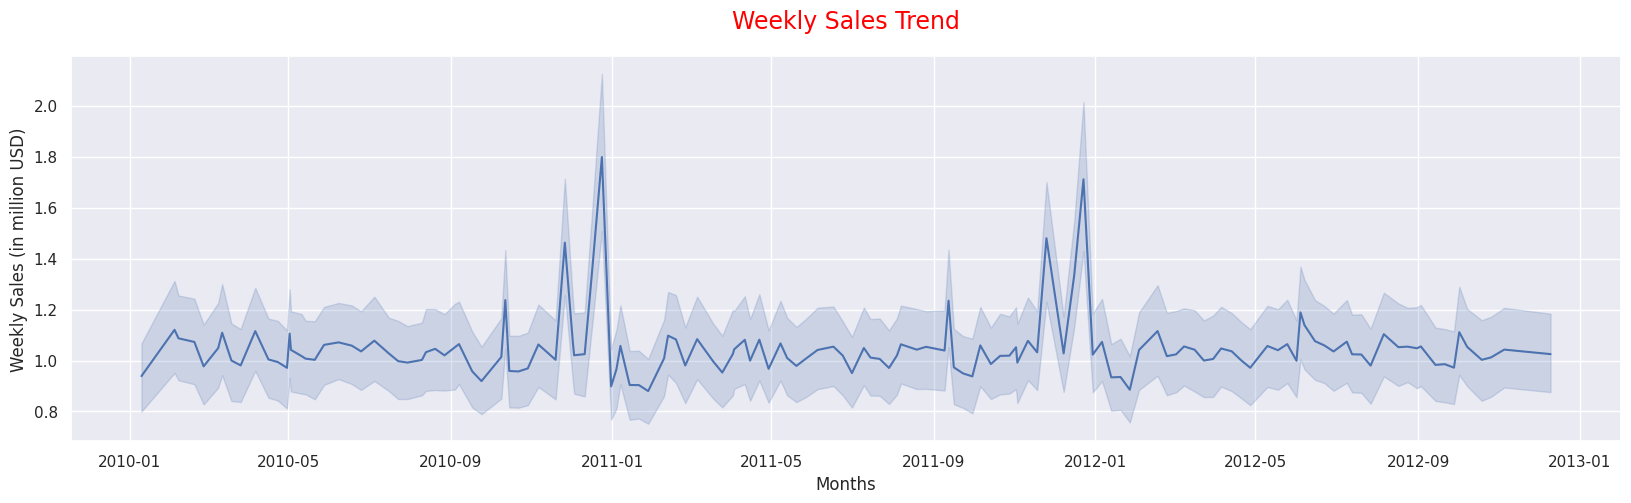

In [ ]:
#Transformando os dados
data['Date'] = pd.to_datetime(data['Date'])
#Gerando um gráfico Vendas Semanais sobre o tempo
plt.figure(figsize=(20,5))

sns.lineplot(x=data.Date, y=(data.Weekly_Sales/1e6))

plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend', fontdict={'fontsize': 17, 'color':'red'}, pad=20)

plt.show()

In [ ]:
data['Day'] = data['Date'].dt.weekday
data['Week'] = data['Date'].dt.week
data['Month'] = data['Date'].dt.month
data['Year']  = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)
data.head()

<ipython-input-116-e0dfb6fb85b3>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [ ]:
# Exibindo  dimensao da base de dados
print("Dimensão dos dados:")
print("Linhas (Instâncias):{}".format(data.shape[0]))
print("Colunas (Atributos):{}".format(data.shape[1]))

Dimensão dos dados:
Linhas (Instâncias):6435
Colunas (Atributos):11


In [ ]:
#Verificando dados nulos
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [ ]:
# Separando os dados em features e target
features = data.drop('Weekly_Sales', axis=1)
target = data['Weekly_Sales']

# Aplicando a funcao train_test_split para dividir o conjunto original em 70% para treindo e 30% para teste
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

print('Tamanho Features Treinamento: ', len(features_train))
print('Tamanho Features Teste: ', len(features_test))
print('Tamanho Target Treinamento: ', len(target_train))
print('Tamanho Target Teste: ', len(target_test))

Tamanho Features Treinamento:  4504
Tamanho Features Teste:  1931
Tamanho Target Treinamento:  4504
Tamanho Target Teste:  1931


In [ ]:
with open('treinamento.txt', 'w+') as f:


      for items in target_test:
          f.write('%s\n' %items)

      print("File written successfully")


f.close()

File written successfully


In [ ]:
#Como precisamos de dividir o modelo de treinamento em 4 partes vamos fazer divisões por dois sucessivas para obter isso
features_um, features_dois, target_um, target_dois= train_test_split(features_train, target_train, test_size=0.5, random_state=1)
print('Tamanho features 1: ',len(features_um))
print('Tamanho features 2: ',len(features_dois))
print('Tamanho saida 1: ',len(target_um))
print('Tamanho saida 2: ',len(target_dois))

Tamanho features 1:  2252
Tamanho features 2:  2252
Tamanho saida 1:  2252
Tamanho saida 2:  2252


In [ ]:
#Agora iremos dividir os dois grupos obtidos na iteração passada por dois, obtendo quatro grupos diferentes
features_um, features_tres, target_um, target_tres= train_test_split(features_um,target_um, test_size=0.5, random_state=123)
features_dois, features_quatro, target_dois, target_quatro= train_test_split(features_dois, target_dois, test_size=0.5, random_state=1)
print('Tamanho features 1: ',len(features_um))
print('Tamanho features 2: ',len(features_tres))
print('Tamanho features 3: ',len(features_dois))
print('Tamanho features 4: ',len(features_quatro))
print('-----------------------')
print('Tamanho target 1: ',len(target_um))
print('Tamanho target 2: ',len(target_tres))
print('Tamanho target 3: ',len(target_dois))
print('Tamanho target 4: ',len(target_quatro))

Tamanho features 1:  1126
Tamanho features 2:  1126
Tamanho features 3:  1126
Tamanho features 4:  1126
-----------------------
Tamanho target 1:  1126
Tamanho target 2:  1126
Tamanho target 3:  1126
Tamanho target 4:  1126


# K-NEAREST NEIGBOURS - KNN

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# Definir parâmetros para busca em grade, esses parametros serao variados para atingir o objetivo pedido no trabalho (Devem ser geradas 15 variações de parâmetros para cada uma das 4 tecnicas de IA;)
parameters = {
    'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
}

# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_features = [features_um, features_dois, features_tres, features_quatro]
subconjuntos_target = [target_um, target_dois, target_tres, target_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_features)):
    X_train = subconjuntos_features[i]
    y_train = subconjuntos_target[i]

    # Criar o classificador de árvore de decisão
    classificador = KNeighborsRegressor(metric='euclidean')

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(classificador, parameters, scoring='neg_mean_absolute_percentage_error', cv=5)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1]*-1)
    print()

Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'n_neighbors': 10}
Melhor pontuação: 0.5232052699217333

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'n_neighbors': 10}
Melhor pontuação: 0.5057878995400061

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'n_neighbors': 10}
Melhor pontuação: 0.5119867334796862

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'n_neighbors': 10}
Melhor pontuação: 0.5323333019903214



## Testando o KNN

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Loop pelos subconjuntos de teste
predicao_KNN= [[] for i in range(4)]
for i in range(4):

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classifier = KNeighborsRegressor(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classifier.fit(subconjuntos_features[i], subconjuntos_target[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classifier.predict(features_test)
    predicao_KNN[i] = y_pred

    # Calcular todas as metricas
    r2 = r2_score(target_test, y_pred,)
    MSE = mean_squared_error(target_test,y_pred)
    RMSE = mean_squared_error(target_test,y_pred, squared=False)
    MAE = mean_absolute_error(target_test,y_pred)
    MAPE = mean_absolute_percentage_error(target_test, y_pred)

    # Exibicao dos resultados
    print(f"-----Subsconjundo de dados {i+1}-----")
    print(f"R2 para o Teste : {r2}")
    #print(f"Erro Quadrático Médio para o Teste : {MSE}")
    #print(f"Raiz Erro Quadrático Médio para o Teste : {RMSE}")
    print(f"Erro Absoluto Médio para o Teste : {MAE}")
    print(f"Mean Absolute Percentage Error para o Teste : {MAPE}")
    print()

-----Subsconjundo de dados 1-----
R2 para o Teste : 0.28754092818115173
Erro Absoluto Médio para o Teste : 386501.357934231
Mean Absolute Percentage Error para o Teste : 0.5024235525916241

-----Subsconjundo de dados 2-----
R2 para o Teste : 0.2824989823898565
Erro Absoluto Médio para o Teste : 384221.26961522526
Mean Absolute Percentage Error para o Teste : 0.5189235423105255

-----Subsconjundo de dados 3-----
R2 para o Teste : 0.2551661650634275
Erro Absoluto Médio para o Teste : 392302.6335877783
Mean Absolute Percentage Error para o Teste : 0.49997273233489486

-----Subsconjundo de dados 4-----
R2 para o Teste : 0.27025769149423395
Erro Absoluto Médio para o Teste : 389215.6962278612
Mean Absolute Percentage Error para o Teste : 0.5164184789084586



In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_KNN[i])
  print()

Lista de Resultados do Teste 1

[1666470.807  664903.821 1124792.098 ...  993554.178  783779.867
  922995.243]

Lista de Resultados do Teste 2

[1558505.019  670421.174 1268316.834 ...  961260.673  913490.231
 1008200.487]

Lista de Resultados do Teste 3

[1587139.725  766685.175 1239229.249 ...  984723.047  801944.825
 1056782.063]

Lista de Resultados do Teste 4

[1606078.904  619012.224 1118430.667 ...  860699.277  861432.116
  967002.889]



In [ ]:
for i in range(4):
  with open(f'KNN_{i+1}.txt', 'w+') as f:


      for items in predicao_KNN[i]:
          f.write('%s\n' %items)

      print("File written successfully")


  f.close()

File written successfully
File written successfully
File written successfully
File written successfully


# FLORESTA ALEATÓRIA

O código de floresta aleatória demora alguns minutos para rodar

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Definir parâmetros para busca em grade, esses parametros serao variados para atingir o objetivo pedido no trabalho (Devem ser geradas 15 variações de parâmetros para cada uma das 4 tecnicas de IA;)
parameters = {
    'n_estimators': [300,310,320,330,340],
    'max_depth': [5, 10, 15]
}

# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_features = [features_um, features_dois, features_tres, features_quatro]
subconjuntos_target = [target_um, target_dois, target_tres, target_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_features)):
    X_train = subconjuntos_features[i]
    y_train = subconjuntos_target[i]

    # Criar o classificador de árvore de decisão
    classificador = RandomForestRegressor(n_jobs=-1)

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(classificador, parameters, scoring='neg_mean_absolute_percentage_error', cv=5)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1]*-1)
    print()

Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'max_depth': 15, 'n_estimators': 320}
Melhor pontuação: 0.09889069484881023

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'max_depth': 15, 'n_estimators': 310}
Melhor pontuação: 0.10475507235687324

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'max_depth': 15, 'n_estimators': 310}
Melhor pontuação: 0.0941876156199931

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'max_depth': 15, 'n_estimators': 320}
Melhor pontuação: 0.09285517006377657



## Testando a Floresta Aleatória

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Loop pelos subconjuntos de teste
predicao_Floresta= [[] for i in range(4)]
for i in range(4):

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classifier = RandomForestRegressor(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classifier.fit(subconjuntos_features[i], subconjuntos_target[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classifier.predict(features_test)
    predicao_Floresta[i] = y_pred

    # Calcular todas as metricas
    r2 = r2_score(target_test, y_pred,)
    MSE = mean_squared_error(target_test,y_pred)
    RMSE = mean_squared_error(target_test,y_pred, squared=False)
    MAE = mean_absolute_error(target_test,y_pred)
    MAPE = mean_absolute_percentage_error(target_test, y_pred)

    # Exibicao dos resultados
    print(f"-----Subsconjundo de dados {i+1}-----")
    print(f"R2 para o Teste : {r2}")
    #print(f"Erro Quadrático Médio para o Teste : {MSE}")
    #print(f"Raiz Erro Quadrático Médio para o Teste : {RMSE}")
    print(f"Erro Absoluto Médio para o Teste : {MAE}")
    print(f"Mean Absolute Percentage Error para o Teste : {MAPE}")
    print()

-----Subsconjundo de dados 1-----
R2 para o Teste : 0.9258434452312114
Erro Absoluto Médio para o Teste : 81816.18764611417
Mean Absolute Percentage Error para o Teste : 0.07806677378657341

-----Subsconjundo de dados 2-----
R2 para o Teste : 0.9228233744877362
Erro Absoluto Médio para o Teste : 88776.92264149478
Mean Absolute Percentage Error para o Teste : 0.08841362884107756

-----Subsconjundo de dados 3-----
R2 para o Teste : 0.9330735281398224
Erro Absoluto Médio para o Teste : 82621.42836608925
Mean Absolute Percentage Error para o Teste : 0.07889826908909171

-----Subsconjundo de dados 4-----
R2 para o Teste : 0.9357073285111891
Erro Absoluto Médio para o Teste : 80429.09472768505
Mean Absolute Percentage Error para o Teste : 0.07464202448475922



In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_Floresta[i])
  print()

Lista de Resultados do Teste 1

[1858579.72763456  483138.32046198 1291199.98110956 ... 1871784.36765625
  643009.7762615  1173789.91074477]

Lista de Resultados do Teste 2

[1910876.78476003  499633.2407545  1362637.46190076 ... 1875297.12985162
  627426.81514439 1251251.45831788]

Lista de Resultados do Teste 3

[2002667.8200823   516010.03419444 1307632.64324496 ... 1785583.80406452
  634033.35078853 1145237.04067169]

Lista de Resultados do Teste 4

[1852455.68770292  498497.70332071 1275600.32222062 ... 1891723.30749166
  617512.46368679 1170157.48569447]



In [ ]:
for i in range(4):
  with open(f'Floresta_{i+1}.txt', 'w+') as f:


      for items in predicao_Floresta[i]:
          f.write('%s\n' %items)

      print("File written successfully")


  f.close()

File written successfully
File written successfully
File written successfully
File written successfully


# Árvore de Decisão

Estrutura na qual cada nó interno representa um "teste" em um atributo do banco de dados

In [ ]:
# Importando bibliotecas
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir parametros para a busca em grade
parameters = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_features = [features_um, features_dois, features_tres, features_quatro]
subconjuntos_target = [target_um, target_dois, target_tres, target_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_features)):
    X_train = subconjuntos_features[i]
    y_train = subconjuntos_target[i]

    # Criar o classificador de árvore de decisão
    regressor = DecisionTreeRegressor()

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(regressor, parameters, scoring='neg_mean_absolute_percentage_error', cv=5)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1]*(-1))
    print()

Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Melhor pontuação: 0.10654624338719842

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor pontuação: 0.11677213455007802

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Melhor pontuação: 0.11219302865705139

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Melhor pontuação: 0.09152094983175381



## Testando a Árvore de Decisão

In [ ]:
# Importando bibliotecas
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Loop pelos subconjuntos de teste
predicao_arvore= [[] for i in range(4)]
for i in range(4):

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classificador = DecisionTreeRegressor(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classificador.fit(subconjuntos_features[i], subconjuntos_target[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classificador.predict(features_test)
    predicao_arvore[i] = y_pred

    # Calcular todas as metricas
    r2 = r2_score(target_test, y_pred,)
    MSE = mean_squared_error(target_test,y_pred)
    RMSE = mean_squared_error(target_test,y_pred, squared=False)
    MAE = mean_absolute_error(target_test,y_pred)
    MAPE = mean_absolute_percentage_error(target_test, y_pred)

    # Exibicao dos resultados
    print(f"-----Subsconjundo de dados {i+1}-----")
    print(f"R2 para o Teste : {r2}")
    print(f"Erro Absoluto Médio para o Teste : {MAE}")
    print(f"Mean Absolute Percentage Error para o Teste : {MAPE}")
    print()

-----Subsconjundo de dados 1-----
R2 para o Teste : 0.8883141078127307
Erro Absoluto Médio para o Teste : 103272.59979883245
Mean Absolute Percentage Error para o Teste : 0.09563573754907607

-----Subsconjundo de dados 2-----
R2 para o Teste : 0.8447641254017966
Erro Absoluto Médio para o Teste : 108675.05175384085
Mean Absolute Percentage Error para o Teste : 0.09878434596885809

-----Subsconjundo de dados 3-----
R2 para o Teste : 0.8816838044861395
Erro Absoluto Médio para o Teste : 103260.31889376751
Mean Absolute Percentage Error para o Teste : 0.09449236385931405

-----Subsconjundo de dados 4-----
R2 para o Teste : 0.9216536620241668
Erro Absoluto Médio para o Teste : 90713.74922478483
Mean Absolute Percentage Error para o Teste : 0.08252202567500662



In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_arvore[i])
  print()

Lista de Resultados do Teste 1

[1824364.66666667  462172.39       1285424.86       ... 1837648.515
  670882.34       1185923.64      ]

Lista de Resultados do Teste 2

[1720530.23   476695.91  1366972.365 ... 1892737.57   644653.89
 1112678.075]

Lista de Resultados do Teste 3

[1997383.0775  475016.125  1311951.3625 ... 1774853.7925  662336.762
  817837.4   ]

Lista de Resultados do Teste 4

[1722577.4725      468307.17       1218578.7        ... 1811060.17833333
  651368.07166667 1082339.315     ]



In [ ]:
for i in range(4):
  with open(f'Arvore_{i+1}.txt', 'w+') as f:


      for items in predicao_arvore[i]:
          f.write('%s\n' %items)

      print("File written successfully")


  f.close()

File written successfully
File written successfully
File written successfully
File written successfully


# XGBoost

Faz um "ensemble" com as árvores de decisão para o treinamento

In [ ]:
# Importando bibliotecas
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

# Definir parametros para a busca em grade
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200]
}

# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_features = [features_um, features_dois, features_tres, features_quatro]
subconjuntos_target = [target_um, target_dois, target_tres, target_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_features)):
    X_train = subconjuntos_features[i]
    y_train = subconjuntos_target[i]

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(XGBRegressor(), param_grid, cv=3)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    model = XGBRegressor(**melhorParam)
    model.fit(X_train, y_train)

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1])
    print()

Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Melhor pontuação: 0.9020252258486221

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Melhor pontuação: 0.9109706472860273

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Melhor pontuação: 0.9153502278027692

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Melhor pontuação: 0.9228447609142005



## Testando o XGBoost

In [ ]:
# Importando bibliotecas
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Loop pelos subconjuntos de teste
predicao_xgboost= [[] for i in range(4)]
for i in range(4):

    # Criar o classificador de árvore de decisão com os melhores parâmetros encontrados
    classificador = XGBRegressor(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classificador.fit(subconjuntos_features[i], subconjuntos_target[i])

    # Fazer previsões no conjunto de teste
    y_pred = classificador.predict(features_test)
    predicao_xgboost[i] = y_pred

   # Calcular todas as metricas
    r2 = r2_score(target_test, y_pred,)
    MSE = mean_squared_error(target_test,y_pred)
    RMSE = mean_squared_error(target_test,y_pred, squared=False)
    MAE = mean_absolute_error(target_test,y_pred)
    MAPE = mean_absolute_percentage_error(target_test, y_pred)

    # Exibicao dos resultados
    print(f"-----Subsconjundo de dados {i+1}-----")
    print(f"R2 para o Teste : {r2}")
    print(f"Erro Absoluto Médio para o Teste : {MAE}")
    print(f"Mean Absolute Percentage Error para o Teste : {MAPE}")
    print()

-----Subsconjundo de dados 1-----
R2 para o Teste : 0.9433351901267369
Erro Absoluto Médio para o Teste : 79944.15319361728
Mean Absolute Percentage Error para o Teste : 0.08797053785485275

-----Subsconjundo de dados 2-----
R2 para o Teste : 0.938222415888336
Erro Absoluto Médio para o Teste : 82465.27094251683
Mean Absolute Percentage Error para o Teste : 0.09690825919226317

-----Subsconjundo de dados 3-----
R2 para o Teste : 0.938062640988458
Erro Absoluto Médio para o Teste : 83737.46610920507
Mean Absolute Percentage Error para o Teste : 0.09291045514200635

-----Subsconjundo de dados 4-----
R2 para o Teste : 0.9460409052843038
Erro Absoluto Médio para o Teste : 80791.6966306318
Mean Absolute Percentage Error para o Teste : 0.09067737446482976



In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_xgboost[i])
  print()

Lista de Resultados do Teste 1

[1835297.   431801.5 1214354.1 ... 1815452.5  632714.4 1059226.5]

Lista de Resultados do Teste 2

[1826239.9   433589.78 1344843.1  ... 1842493.4   629921.6  1185440.6 ]

Lista de Resultados do Teste 3

[1944293.9   327552.7  1299517.2  ... 1737212.1   633539.06 1040377.8 ]

Lista de Resultados do Teste 4

[1951481.6   381740.03 1215575.6  ... 1868920.8   622529.4  1057945.6 ]



In [ ]:
for i in range(4):
  with open(f'XGBoost_{i+1}.txt', 'w+') as f:


      for items in predicao_xgboost[i]:
          f.write('%s\n' %items)

      print("File written successfully")


  f.close()

File written successfully
File written successfully
File written successfully
File written successfully
